<a href="https://colab.research.google.com/github/marianadavidmarquez/PROYECTO-IA/blob/main/01_exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="display: flex; justify-content: space-between; align-items: center;">
  <div>
    <h1 style="margin-bottom: 0;">EXPLORACIÓN DE LOS DATOS DE LA COMPETENCIA</h1>
    <ul style="margin-top: 5px; font-size: 16px;">
      <li>Keudith Manco Sencio</li>
      <li>Gabriela Tejada Arias</li>
      <li>Mariana David Márquez</li>
    </ul>
  </div>
  <div>
    <img src="https://drive.google.com/uc?id=1UZbJzROZ99opQw9AwypHYn6ZO_QGsSHw"
         alt="Logo UdeA"
         style="width: 120px;"/>
  </div>
</div>




# Cargar los recursos

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()



replicating local resources


# Cargar datos


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"marianadavidmarquez","key":"017fd8a916d05d8538abe5ea3967a4a6"}'}

In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia


  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 1.37GB/s]


In [4]:
!unzip udea*.zip > /dev/null && echo "✅ Descompresión finalizada"


✅ Descompresión finalizada


In [5]:
!ls -lh *.csv
#Verificando si ya están descomprimidos los archivos en el entorno de colab


-rw-r--r-- 1 root root 4.5M Sep 16 01:46 submission_example.csv
-rw-r--r-- 1 root root  57M Sep 16 01:46 test.csv
-rw-r--r-- 1 root root 138M Sep 16 01:46 train.csv


In [6]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  59185238 test.csv
   692501  10666231 143732437 train.csv
  1286075  15528571 207634348 total


In [7]:
import pandas as pd
import numpy as np

z = pd.read_csv("train.csv")
print ("shape of loaded dataframe", z.shape)

shape of loaded dataframe (692500, 21)


In [8]:
z.head()



,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


# EXPLORACIÓN Y ANÁLISIS DE LOS DATOS.
---



### Distribución del rendimiento global:





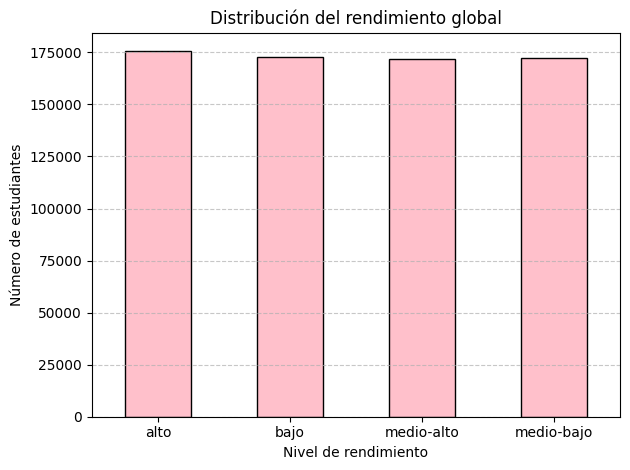

In [9]:
import matplotlib.pyplot as plt

z['RENDIMIENTO_GLOBAL'].value_counts().sort_index().plot(kind='bar', color='pink', edgecolor='black')
plt.title('Distribución del rendimiento global')
plt.xlabel('Nivel de rendimiento')
plt.ylabel('Número de estudiantes')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

###### Análisis del gráfico de barras anterior:
Podemos notar que los niveles de rendimiento abarcan la misma cantidad de estudiantes aproximadamente. Lo cual nos lleva a reflexionar, que no hay un nivel de rendimiento que se sobreponga con mucha diferencia sobre los demás niveles.



### Cantidad de estudiantes por programa académico:

In [10]:
conteo_programas = z.groupby("E_PRGM_ACADEMICO").size().reset_index(name="cantidad_estudiantes")

# Mostrar la tabla
print(conteo_programas)

# Ordenando
conteo_programas = conteo_programas.sort_values("cantidad_estudiantes", ascending=False)
print(conteo_programas)


                                   E_PRGM_ACADEMICO  cantidad_estudiantes
0    3°  CICLO PROFESIONAL NEGOCIOS INTERNACIONALES                    69
1                        ACTIVIDAD FISICA Y DEPORTE                   162
2                                       ACUICULTURA                    79
3                                    ADMINISTRACION                   117
4                        ADMINISTRACION  FINANCIERA                    74
..                                              ...                   ...
943                                  TRABAJO SOCIAL                 12686
944               TRADUCCION INGLES-FRANCES-ESPAÑOL                    68
945                                         TURISMO                   222
946                                       URBANISMO                     7
947                                       ZOOTECNIA                  1669

[948 rows x 2 columns]
                                      E_PRGM_ACADEMICO  cantidad_estudiantes
249        

###### Conforme a lo anterior, tenemos que existen 948 programas académicos en total abarcados en este estudio, esto refleja una gran variedad de áreas de conocimiento.
De igual modo, los programas acádemicos como Derecho, Administración de Empresas, Contaduría Pública, Psicología e Ingeniería Industrial son los que concentran la mayor proporción de población estudiantil.

Por otro lado, hay programas con muy pocos estudiantes como por ejemplo, Química y Farmacia, Administración Tecnológica, Ingeniería de minas o Profesional en Investigación Criminal.

### Definición de: estudiantes_program

In [11]:
estudiantes_program = z.groupby('E_PRGM_ACADEMICO').size()
estudiantes_program

,0
E_PRGM_ACADEMICO,
3° CICLO PROFESIONAL NEGOCIOS INTERNACIONALES,69
ACTIVIDAD FISICA Y DEPORTE,162
ACUICULTURA,79
ADMINISTRACION,117
ADMINISTRACION FINANCIERA,74
...,...
TRABAJO SOCIAL,12686
TRADUCCION INGLES-FRANCES-ESPAÑOL,68
TURISMO,222


### Top 10 de programas académicos con mayor presencia de estudiantes:




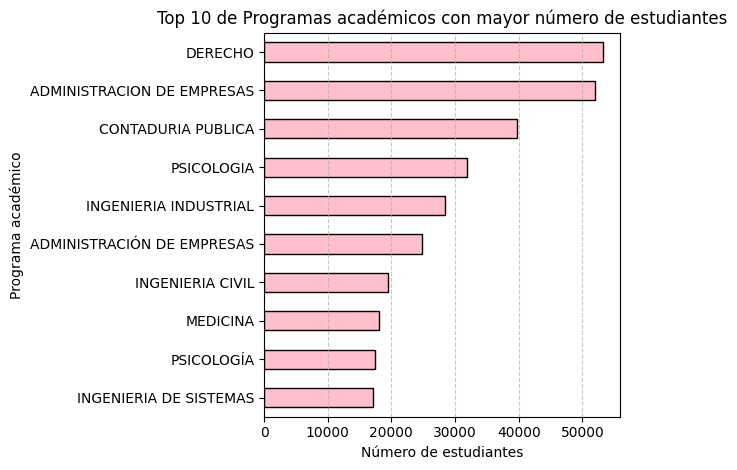

In [12]:
estudiantes_program.sort_values(ascending=False).head(10).plot(kind='barh', color='pink', edgecolor='black')
plt.title('Top 10 de Programas académicos con mayor número de estudiantes')
plt.xlabel('Número de estudiantes')
plt.ylabel('Programa académico')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

###### Partiendo del top 10 de programas académicas con la mayor presencia de estudiantes, notamos que los programas como Derecho y Administración de Empresas son quienes lideran el top, donde ambos superan los 50.000 estudiantes, lo cual puede indicar que son carreras altamente demandadas y con amplía oferta en las entidades educativas.

También notamos una buena presencia de ingenenierías y psicología, aunque con una diversidad menor.

### Cantidad de estudiantes por departamento:

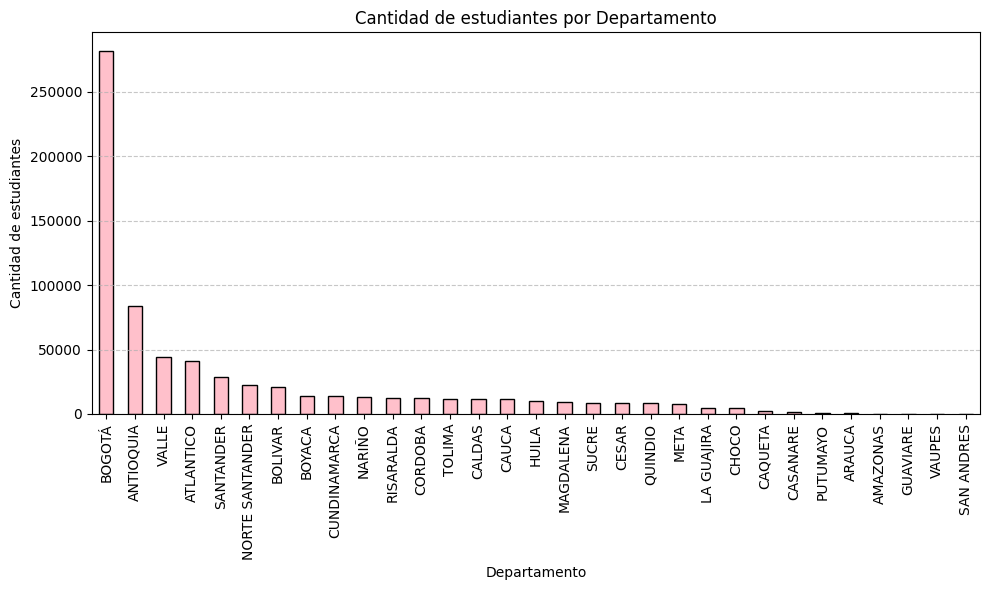

In [13]:
import matplotlib.pyplot as plt

z['E_PRGM_DEPARTAMENTO'].value_counts().sort_values(ascending=False).plot(
    kind='bar', figsize=(10,6), color='pink', edgecolor='black'
)
plt.title('Cantidad de estudiantes por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Cantidad de estudiantes')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

###### El gráfico de barras anterior evidencia la fuerte concentración de estudiantes principalmente en Bogotá, Antioquía, Valle y Atlántico, pero la poca participación educativa en departamentos como Casanare, Putumayo, Arauca, Amazonas, Guaviare, Vaupes y San Andres.

In [14]:
from rlxutils import subplots
import matplotlib.pyplot as plt

### Relación entre la cantidad de estudiantes por programa académico y su rendimiento global:

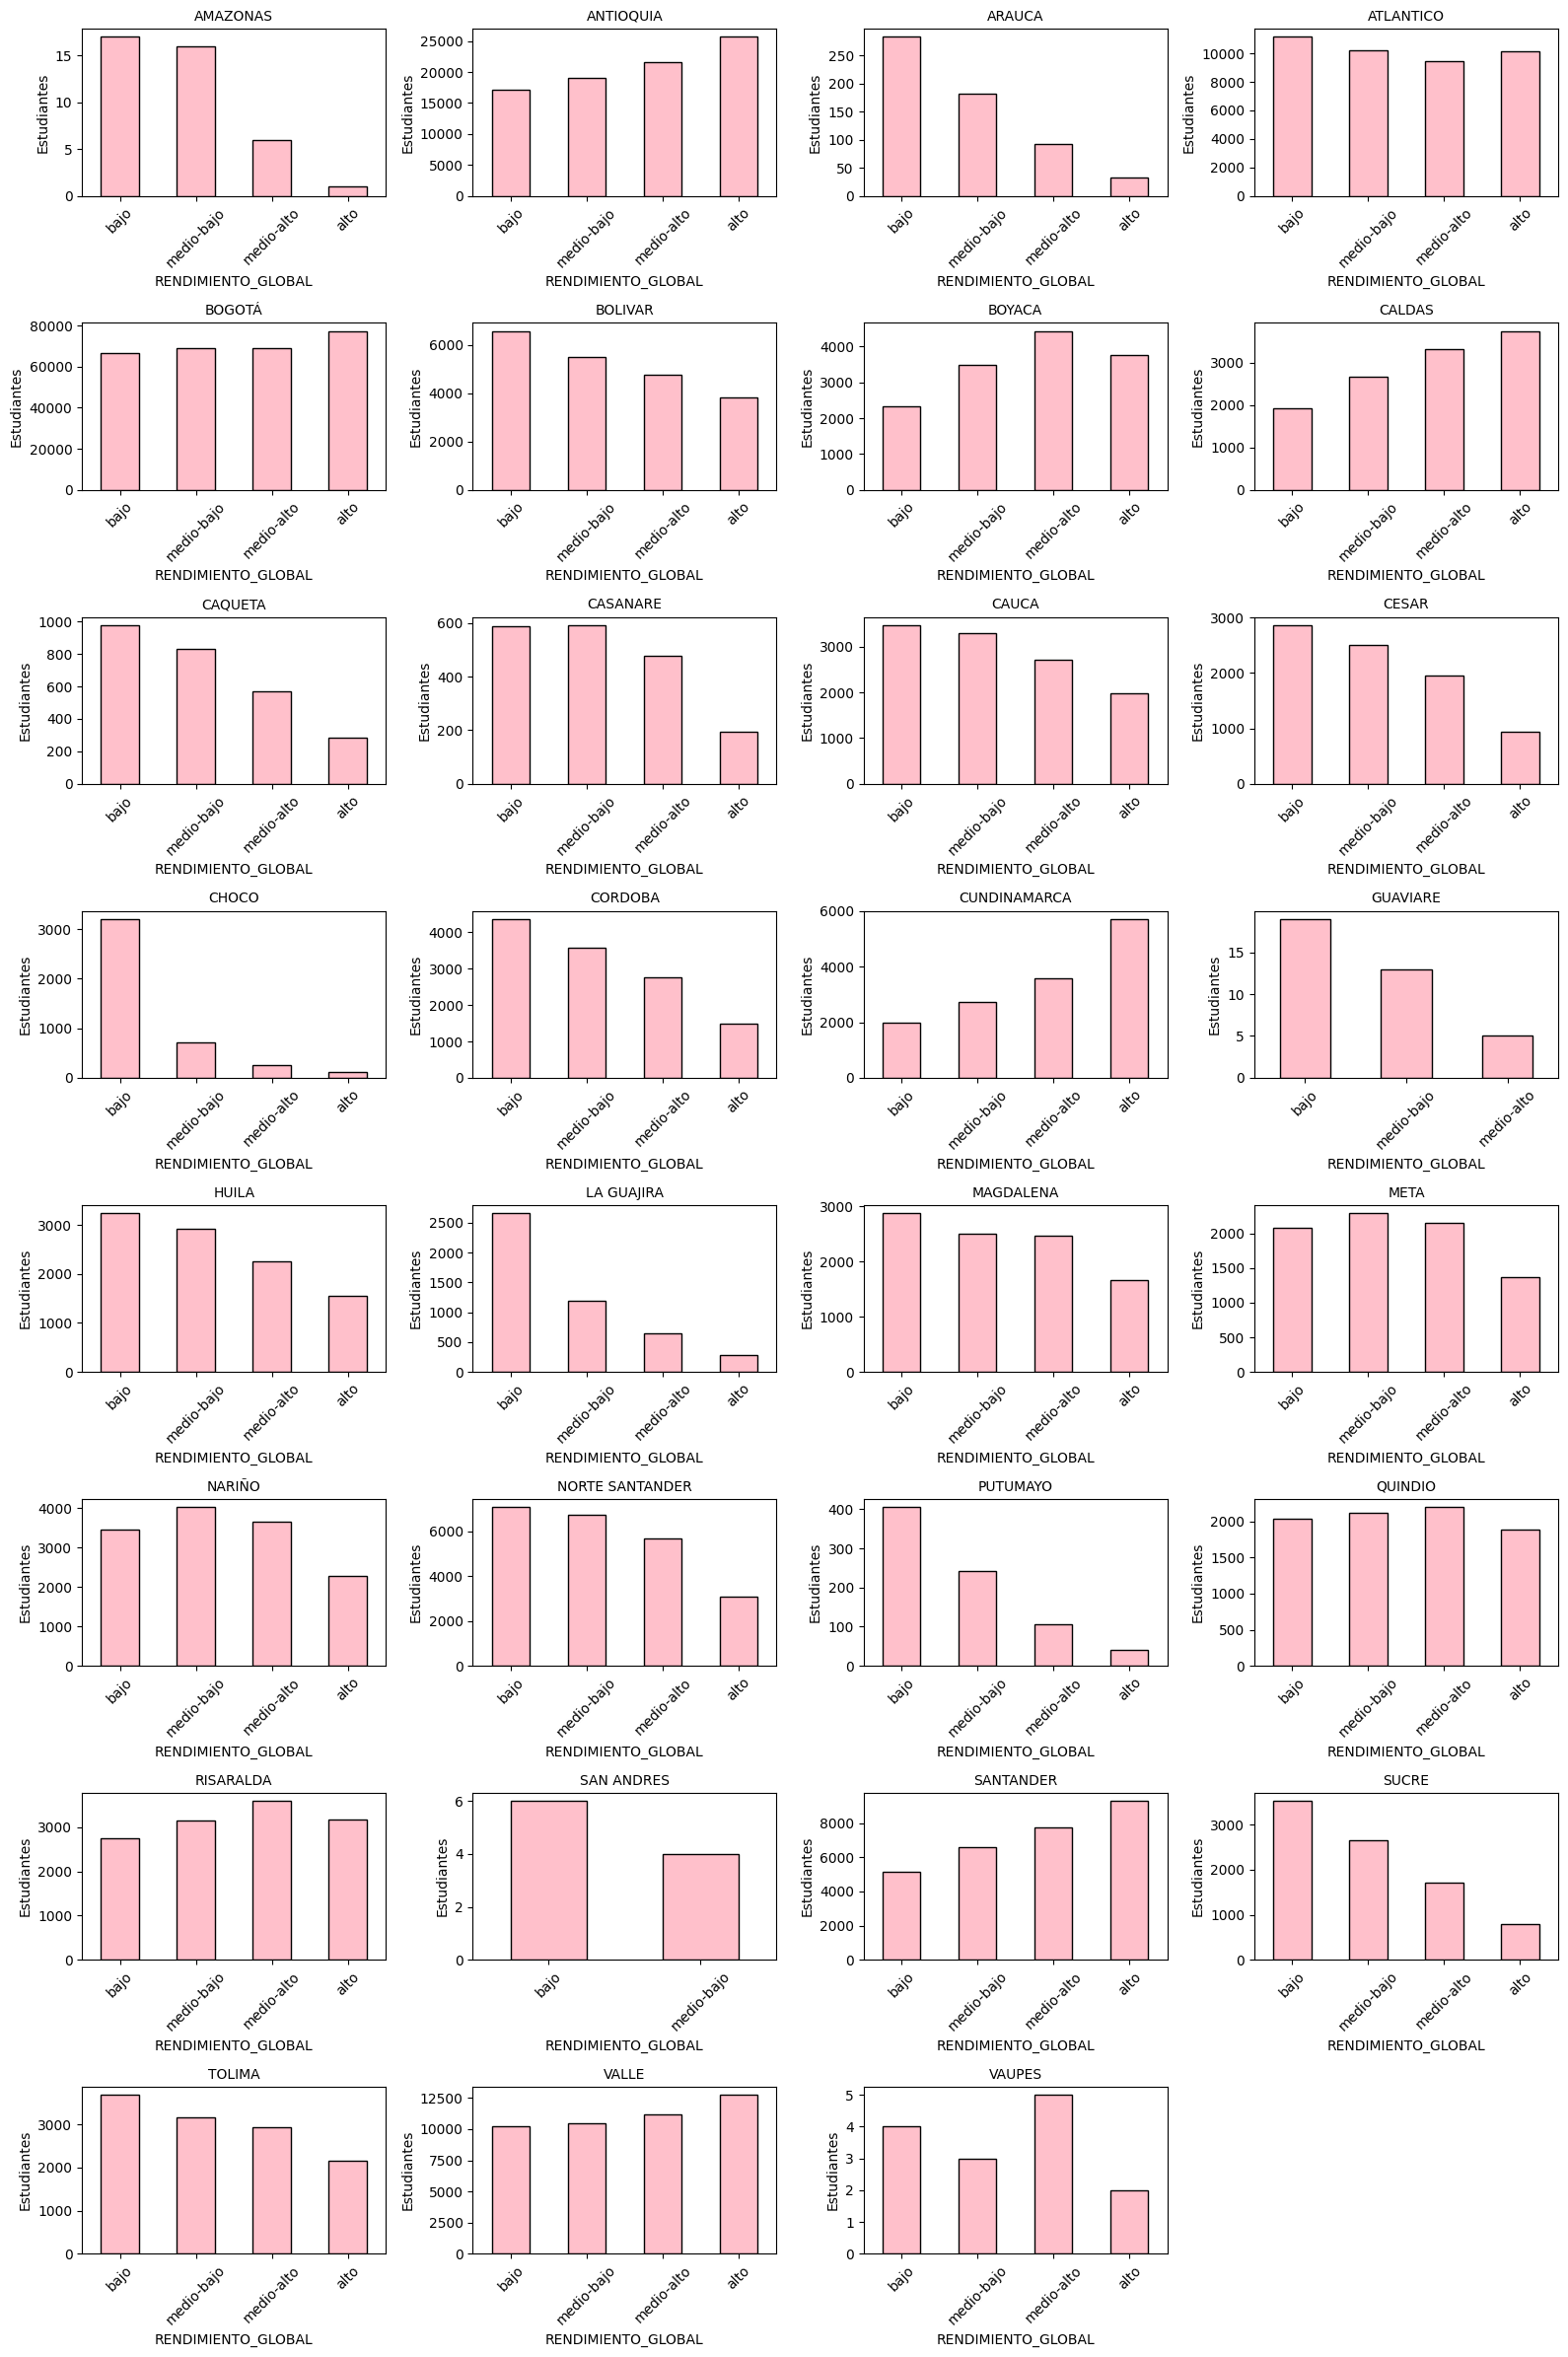

In [15]:
c = sorted(z.E_PRGM_DEPARTAMENTO.value_counts().index)

for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.E_PRGM_DEPARTAMENTO==ci]
    counts = zc.RENDIMIENTO_GLOBAL.value_counts()

    required_values = ['bajo', 'medio-bajo', 'medio-alto', 'alto']
    existing_values = [val for val in required_values if val in counts.index]

    counts = counts[existing_values]

    if not counts.empty: # Check if counts is not empty
        counts.plot(kind='bar', ax=ax, color='pink', edgecolor='black')
        ax.set_title(ci, fontsize=10)
        ax.set_ylabel('Estudiantes')
        ax.set_xticklabels(counts.index, rotation=45)
    else:
        ax.set_title(f"{ci}\nNo data for performance", fontsize=10) # Add a title for empty plots
        ax.axis('off') # Turn off axis for empty plots


plt.tight_layout()
plt.show()

###### En primer lugar notamos que en los departamentos con mayor volumen de estudiantes, como los mencionados anteriormente, presentan de igual modo una distribución equilibrada en todas las categorías del rendimiento, sin embargo se observa un mejor desempeño académico promedio en comparación con los demás departamentos.

Por su parte, los departamentos periféricos y de menor población, es decir, que tienen menos estudiantes predominan en niveles de desempeño Bajo, lo cual no es nada alentador.

### Cantidad de estudiantes asociados al respectivo rango de horas que dedican a laborar:

<Axes: xlabel='E_HORASSEMANATRABAJA', ylabel='Cantidad de estudiantes'>

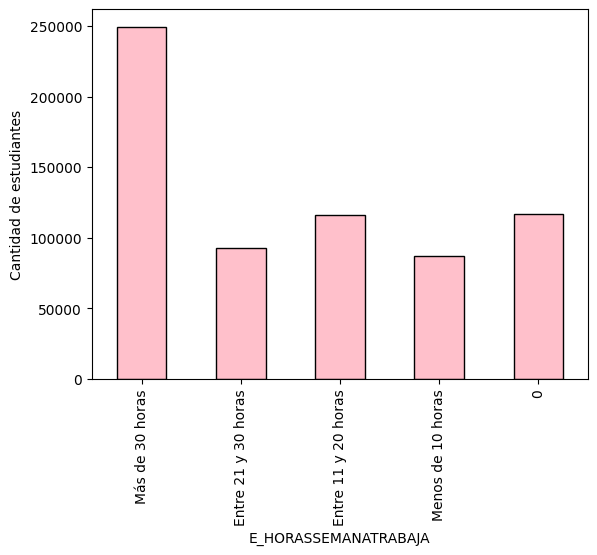

In [16]:
horas = [
    "Más de 30 horas",
    "Entre 21 y 30 horas",
    "Entre 11 y 20 horas",
    "Menos de 10 horas",
    "0"

]
plt.ylabel('Cantidad de estudiantes')
z.E_HORASSEMANATRABAJA.value_counts().reindex(horas).plot(kind='bar', color='pink', edgecolor='black')



###### El gráfico anterior nos indica que la mayoría de estudiantes trabaja mientras estudia, y el grupo más grande lo hace con una carga superior a 30 horas semanales, es decir, aproximadamente como una jornada laboral completa.
Esto puede indicar, que la mayoría de estudiantes deben asumir responsabilidades económicas importantes, y que a su vez esta gran cantidad de horas dedicadas al trabajo puede afectar directamente su desempeño académico.
De igual modo, existe una cantidad considerable de estudiantes que no trabaja o en su defecto, lo hacen durantes pocas horas.

### Relación entre la cantidad de estudiantes distribuidos en el rango de horas que dedican a laborar y su respectivo rendimiento global:

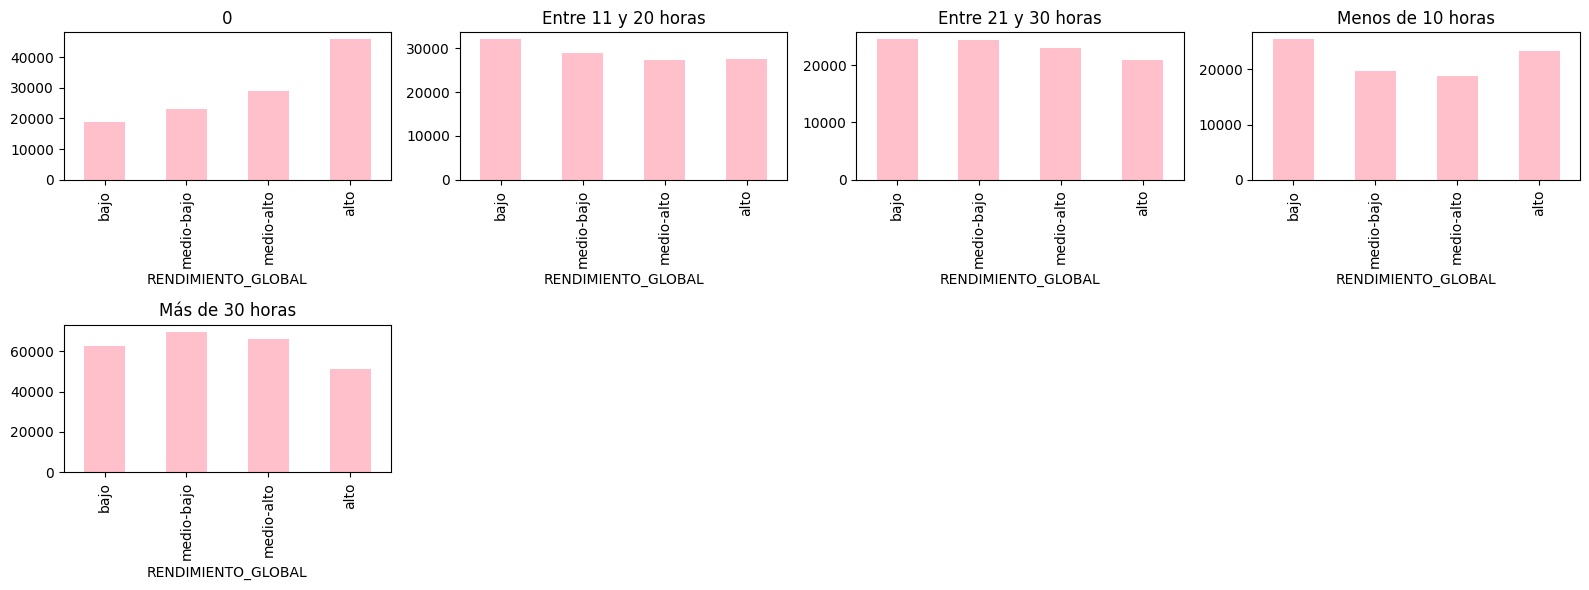

In [17]:
c = sorted(z.E_HORASSEMANATRABAJA.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.E_HORASSEMANATRABAJA==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar',color='pink',)
    plt.title(ci)

### Cantidad de estudiantes por estrato socioeconómico:

In [18]:
estudiantes_estrato = z.groupby('F_ESTRATOVIVIENDA').size()
estudiantes_estrato

,0
F_ESTRATOVIVIENDA,
Estrato 1,111991
Estrato 2,232671
Estrato 3,210685
Estrato 4,65514
Estrato 5,23608
Estrato 6,12605
Sin Estrato,3289


### Cantidad de estudiantes que pagaron o no su matricula de forma propia:

In [19]:
estudiantes_pagomatr = z.groupby('E_PAGOMATRICULAPROPIO').size()
estudiantes_pagomatr

,0
E_PAGOMATRICULAPROPIO,
No,382201
Si,303801


### Distribución de estudiantes por pago de matrícula propia a través de un gráfico circular:

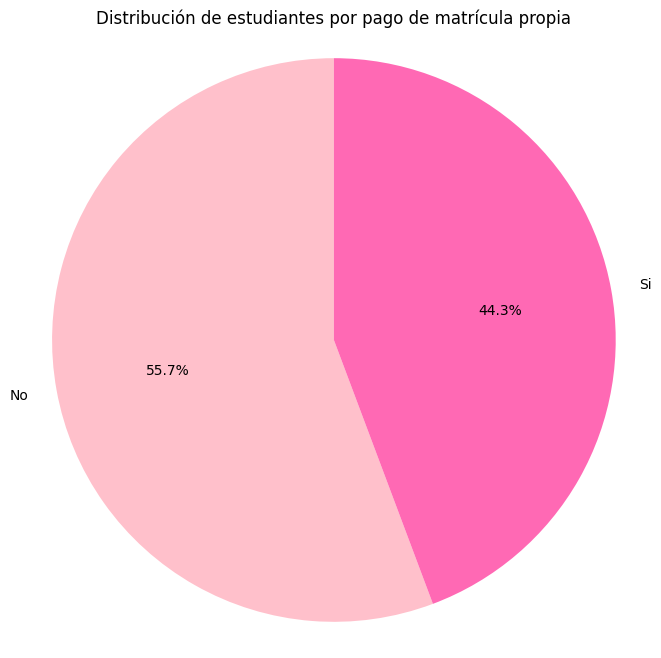

In [20]:
plt.figure(figsize=(8,8))
plt.pie(
    estudiantes_pagomatr,
    labels=estudiantes_pagomatr.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#FFC0CB', '#FF69B4', '#DB7093', '#C71585', '#8B008B']  # tonos rosa y morado
)

plt.title('Distribución de estudiantes por pago de matrícula propia')
plt.axis('equal')
plt.show()

### Cantidad de estudiantes privados de la libertad:

In [21]:
estudiantes_priv_libertad = z.groupby('E_PRIVADO_LIBERTAD').size()
estudiantes_priv_libertad

,0
E_PRIVADO_LIBERTAD,
N,692466
S,34


### Cantidad de estudiantes que tienen o no computador:

In [22]:
estudiantes_tiene_compu = z.groupby('F_TIENECOMPUTADOR').size()
estudiantes_tiene_compu

,0
F_TIENECOMPUTADOR,
No,56727
Si,597670


### Distribución de estudiantes que tienen computador a través de un gráfico de circular:

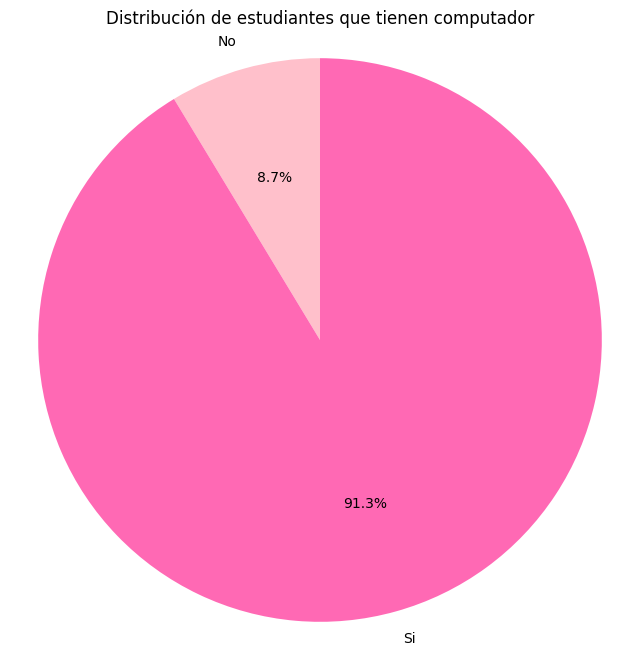

In [23]:
plt.figure(figsize=(8,8))
plt.pie(estudiantes_tiene_compu,
        labels=estudiantes_tiene_compu.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#FFC0CB', '#FF69B4', '#DB7093', '#C71585', '#8B008B']
        )

plt.title('Distribución de estudiantes que tienen computador')

plt.axis('equal')

plt.show()

### Cantidad de estudiantes que tienen o no internet:

In [24]:
estudiantes_tiene_internet= z.groupby('F_TIENEINTERNET').size()
estudiantes_tiene_internet

,0
F_TIENEINTERNET,
No,73357
Si,592514


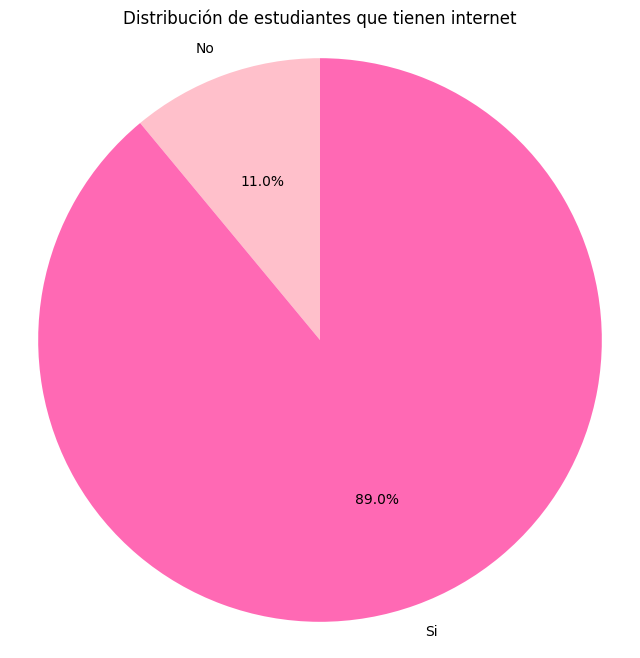

In [25]:
plt.figure(figsize=(8,8))
plt.pie(estudiantes_tiene_internet,
        labels=estudiantes_tiene_internet.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#FFC0CB', '#FF69B4', '#DB7093', '#C71585', '#8B008B']
        )

plt.title('Distribución de estudiantes que tienen internet')

plt.axis('equal')

plt.show()